In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from math import ceil

import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import scipy.stats as scs
import statsmodels.api as sm




from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


import timeit
import datetime as dt

In [4]:
data = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jan_Jun.csv')
data_2 = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jul_Dec.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
        dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe
def make_date_time_col(df):
    df['Data Date']= df['Data Date'].astype(str)
    df['Data Date']= df['Data Date'].replace(['/', '-'])
    df['Hour Number'] = df['Hour Number'].astype(str)
    
    df['New_datetime'] = df['Data Date'].map(str) + " " + df['Hour Number']
    return df

In [6]:
lst_cols = ['Demand (MW)','Net Generation (MW) from Natural Gas', 'Net Generation (MW) from Nuclear','Net Generation (MW) from All Petroleum Products','Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources','Net Generation (MW)','Demand Forecast (MW)', 'Total Interchange (MW)', 'Net Generation (MW) (Adjusted)','Net Generation (MW) from Coal','Sum(Valid DIBAs) (MW)','Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)','Demand (MW) (Adjusted)']
data_convert = change_cols_to_floats(data, lst_cols)
data_2_convert = change_cols_to_floats(data_2, lst_cols)

In [7]:
lst_data = [data_convert,data_2_convert]
df_total = pd.concat(lst_data)

In [ ]:
# small_sample = df_total.sample(n=400)

In [28]:
df_total['Hour Number'] = df_total['Hour Number'].replace('24', '0')
df_total['Hour Number'] = df_total['Hour Number'].replace('25', '0')
make_date_time_col(df_total)

df_total['New_datetime']= df_total['New_datetime'].apply(lambda x:f'{x}:00:00')
# small_sample['New_datetime'] = pd.to_datetime(small_sample['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [ ]:
small_sample.info()
small_sample.head(30)

In [30]:
df_total['New_datetime'] = pd.to_datetime(df_total['New_datetime'],infer_datetime_format=True, format ='%m/%d/%Y %H')

In [16]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562344 entries, 0 to 282675
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Balancing Authority                                     562344 non-null  object 
 1   Data Date                                               562344 non-null  object 
 2   Hour Number                                             562344 non-null  object 
 3   Local Time at End of Hour                               562344 non-null  object 
 4   UTC Time at End of Hour                                 562344 non-null  object 
 5   Demand Forecast (MW)                                    463182 non-null  float64
 6   Demand (MW)                                             471116 non-null  float64
 7   Net Generation (MW)                                     558363 non-null  float64
 8   Total Interchange (MW)  

In [25]:
df_total['Hour Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '0', '25'], dtype=object)

In [27]:
df_total[df_total['Hour Number']== '25']

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime
2976,AEC,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 6:00:00 AM,676.0,331.0,90.0,-241.0,-241.0,...,-4.0,89.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,11/01/2020 25:00:00
7393,AECI,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 6:00:00 AM,2547.0,2566.0,2256.0,-310.0,-315.0,...,1872.0,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,11/01/2020 25:00:00
11810,AVA,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,1125.0,1191.0,586.0,-605.0,-605.0,...,NaN,248.0,NaN,NaN,266.0,0.0,13.0,59.0,NaN,11/01/2020 25:00:00
16227,AVRN,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,NaN,NaN,400.0,400.0,400.0,...,NaN,409.0,NaN,NaN,0.0,0.0,-9.0,NaN,NaN,11/01/2020 25:00:00
25060,BANC,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,NaN,NaN,NaN,-489.0,NaN,...,NaN,799.0,NaN,NaN,176.0,4.0,NaN,16.0,NaN,11/01/2020 25:00:00
29477,BPAT,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,5134.0,5186.0,7475.0,6780.0,6780.0,...,NaN,267.0,1164.0,NaN,5836.0,0.0,0.0,208.0,NaN,11/01/2020 25:00:00
33894,CHPD,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/01/2020 25:00:00
38311,CISO,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 8:00:00 AM,20742.0,20238.0,11463.0,-7029.0,-7029.0,...,15.0,10029.0,-74.0,NaN,971.0,-37.0,410.0,61.0,NaN,11/01/2020 25:00:00
42728,CPLE,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 5:00:00 AM,NaN,5187.0,5017.0,-170.0,-168.0,...,125.0,715.0,3516.0,NaN,43.0,-1.0,NaN,619.0,NaN,11/01/2020 25:00:00
47145,CPLW,11/01/2020,25,11/02/2020 12:00:00 AM,11/02/2020 5:00:00 AM,NaN,515.0,324.0,-191.0,-191.0,...,0.0,159.0,NaN,NaN,74.0,0.0,NaN,91.0,NaN,11/01/2020 25:00:00


In [29]:
df_total[df_total['Hour Number']== '25']

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime


In [31]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562344 entries, 0 to 282675
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count   Dtype         
---  ------                                                  --------------   -----         
 0   Balancing Authority                                     562344 non-null  object        
 1   Data Date                                               562344 non-null  object        
 2   Hour Number                                             562344 non-null  object        
 3   Local Time at End of Hour                               562344 non-null  object        
 4   UTC Time at End of Hour                                 562344 non-null  object        
 5   Demand Forecast (MW)                                    463182 non-null  float64       
 6   Demand (MW)                                             471116 non-null  float64       
 7   Net Generation (MW)                            

In [32]:
sample_data = df_total.sample(n =500)

In [33]:
sample_data['Demand Delta'] = sample_data['Demand Forecast (MW)']- sample_data['Demand (MW)']

# EXPLORATORY DATA 

In [34]:
sample_data.head()

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta
197262,SCEG,01/24/2020,20,01/24/2020 8:00:00 PM,01/25/2020 1:00:00 AM,2535.0,2531.0,2801.0,270.0,270.0,...,1338.0,993.0,NaN,116.0,0.0,NaN,NaN,NaN,2020-01-24 20:00:00,4.0
26968,BPAT,02/01/2020,22,02/01/2020 10:00:00 PM,02/02/2020 6:00:00 AM,6653.0,6882.0,12259.0,11268.0,11268.0,...,506.0,1172.0,NaN,8123.0,0.0,2224.0,NaN,NaN,2020-02-01 22:00:00,-229.0
132743,JEA,07/10/2020,23,07/10/2020 11:00:00 PM,07/11/2020 3:00:00 AM,1948.0,2002.0,1749.0,-253.0,-253.0,...,855.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2020-07-10 23:00:00,-54.0
20208,AZPS,04/24/2020,5,04/24/2020 5:00:00 AM,04/24/2020 12:00:00 PM,2536.0,2462.0,1399.0,2031.0,2031.0,...,1272.0,NaN,NaN,0.0,5.0,0.0,NaN,NaN,2020-04-24 05:00:00,74.0
130658,ISNE,10/16/2020,3,10/16/2020 3:00:00 AM,10/16/2020 7:00:00 AM,9350.0,9608.0,7207.0,-2401.0,-2401.0,...,3635.0,2097.0,NaN,394.0,0.0,491.0,NaN,NaN,2020-10-16 03:00:00,-258.0


In [37]:
sample_data['Net Generation Delta'] = sample_data['Net Generation (MW)']- sample_data['Demand (MW)']
sample_data.head()

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,New_datetime,Demand Delta,Net Generation Delta
197262,SCEG,01/24/2020,20,01/24/2020 8:00:00 PM,01/25/2020 1:00:00 AM,2535.0,2531.0,2801.0,270.0,270.0,...,993.0,NaN,116.0,0.0,NaN,NaN,NaN,2020-01-24 20:00:00,4.0,270.0
26968,BPAT,02/01/2020,22,02/01/2020 10:00:00 PM,02/02/2020 6:00:00 AM,6653.0,6882.0,12259.0,11268.0,11268.0,...,1172.0,NaN,8123.0,0.0,2224.0,NaN,NaN,2020-02-01 22:00:00,-229.0,5377.0
132743,JEA,07/10/2020,23,07/10/2020 11:00:00 PM,07/11/2020 3:00:00 AM,1948.0,2002.0,1749.0,-253.0,-253.0,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2020-07-10 23:00:00,-54.0,-253.0
20208,AZPS,04/24/2020,5,04/24/2020 5:00:00 AM,04/24/2020 12:00:00 PM,2536.0,2462.0,1399.0,2031.0,2031.0,...,NaN,NaN,0.0,5.0,0.0,NaN,NaN,2020-04-24 05:00:00,74.0,-1063.0
130658,ISNE,10/16/2020,3,10/16/2020 3:00:00 AM,10/16/2020 7:00:00 AM,9350.0,9608.0,7207.0,-2401.0,-2401.0,...,2097.0,NaN,394.0,0.0,491.0,NaN,NaN,2020-10-16 03:00:00,-258.0,-2401.0


array([[<AxesSubplot:title={'center':'Demand (MW)'}>]], dtype=object)

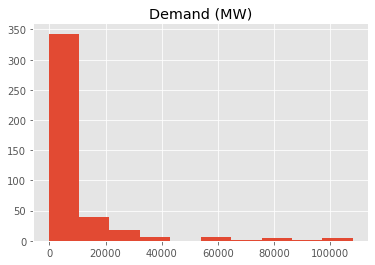

In [46]:
sample_data.hist(column = 'Demand (MW)')
# x = np.arange(0, 23)
# # fig, ax =plt.subplots(figsize =(12,12))
# # ax.hist(y, bins = 24)
# fig, ax  = plt.subplots(figsize = (12,12))
# ax.plot(x, y)

In [47]:
x = sample_data('Hour Number')
y = sample_data('Demand (MW)')

fig, ax =plt.subplots(figsize =(12,12))
ax.hist(x, y)

TypeError: 'DataFrame' object is not callable